<a href="https://colab.research.google.com/github/athiniotim/Final_Essay_Forest_Fires/blob/main/forest_fires_athensvoice_climate_change_Michaela_Athinioti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Final Essay ΕΔΔΕ.2 Αθηνιώτη Μιχαέλα/clean csv/forest_fires_athensvoice_articles_csv.csv')
df.head()

,article_url,title,date,time,section,author,excerpt,subtitle,text_body,feat_img_link
0,https://www.athensvoice.gr/epikairotita/diethn...,Μαγικές εικόνες από την «Πόλη του Πάγου» της Κ...,2024-12-29,10:40:50,Κοσμος,Newsroom,Ουρανοξύστες και ναοί φτιαγμένοι από πάγο στο ...,Το πάρκο έχει έκταση ενός εκατομμυρίου τετραγω...,"Διάφορα κτίρια-ορόσημα του Χονγκ Κονγκ, του Μα...",https://www.athensvoice.gr/images/1074x600/jpg...
1,https://www.athensvoice.gr/epikairotita/diethn...,Καζακστάν: Η Azerbaijan Airlines ανακοίνωσε ότ...,2024-12-27,11:26:13,Κοσμος,Newsroom,Καζακστάν: Η Azerbaijan Airlines ανακοίνωσε ότ...,Φόβοι για την ασφάλεια των πτήσεων,Η Azerbaijan Airlines ανακοίνωσε ότι διακόπτει...,https://www.athensvoice.gr/images/1074x600/1/j...
2,https://www.athensvoice.gr/epikairotita/diethn...,Η Ρωσία ξεκίνησε τη χρήση bitcoin για να αντιμ...,2024-12-25,15:02:24,Κοσμος,Newsroom,Ο Ρώσος Πρόεδρος Βλαντιμίρ Πούτιν δήλωσε ότι κ...,Ο Βλαντιμίρ Πούτιν υποστηρίζει την εκτεταμένη ...,Εταιρείες στη Ρωσία ξεκίνησαν να χρησιμοποιούν...,https://www.athensvoice.gr/images/1074x600/1/j...
3,https://www.athensvoice.gr/epikairotita/politi...,Μιλένα Αποστολάκη προς Τάκη Θεοδωρικάκο: Μαζικ...,2024-12-19,10:11:59,Πολιτικη & Οικονομια,Newsroom,Μιλένα Αποστολάκη προς Τάκη Θεοδωρικάκο: Μαζικ...,Η βουλευτής Βόρειου Τομέα του ΠΑΣΟΚ σημειώνει ...,"Το μείζον θέμα των υπέρογκων, διαδοχικών και α...",https://www.athensvoice.gr/images/1074x600/1/j...
4,https://www.athensvoice.gr/life/perivallon/882...,Πόσο αυξήθηκαν οι πυρκαγιές το 2024 - Η ανασκό...,2024-12-17,18:12:54,Περιβαλλον,Newsroom,Πόσο αυξήθηκαν οι πυρκαγιές το 2024 - Η ανασκό...,Εθνικό Αστεροσκοπείο Αθηνών και WWF Ελλάς εγκα...,Η ολοκληρωμένη ανασκόπηση της αντιπυρικής περι...,https://www.athensvoice.gr/images/1074x600/jpg...


In [20]:
import re
from collections import Counter

df['text'] = df['title'].fillna('') + '' + df['excerpt'].fillna('') + '' + df['subtitle'].fillna('') + '' + df['text_body'].fillna('')
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df_2023 = df[df['date'].dt.year == 2023]

klimatikh_krish_articles = df_2023[df_2023['text'].fillna('').str.contains("κλιματικ", case=False)]

words_around = []

for text in klimatikh_krish_articles['text']:

    if isinstance(text, str):
        matches = re.finditer(r"(.{0,50}κλιματικ.{0,50})", text, flags=re.IGNORECASE)
        words_around += [m.group(0) for m in matches]

In [21]:
total_articles = len(df_2023)
klimatik_count = len(klimatikh_krish_articles)

In [22]:
percentage = klimatik_count / total_articles * 100

In [23]:
print(f"Άρθρα με αναφορά στην κλιματική αλλαγή: {klimatik_count} ({percentage:.2f}%) από {total_articles}")

Άρθρα με αναφορά στην κλιματική αλλαγή: 122 (39.74%) από 307


In [24]:
klimatikh_krish_articles['month'] = klimatikh_krish_articles['date'].dt.to_period('M')

<ipython-input-24-2484829211>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  klimatikh_krish_articles['month'] = klimatikh_krish_articles['date'].dt.to_period('M')


In [25]:
monthly_counts = klimatikh_krish_articles.groupby('month').size()

In [26]:
import matplotlib.pyplot as plt

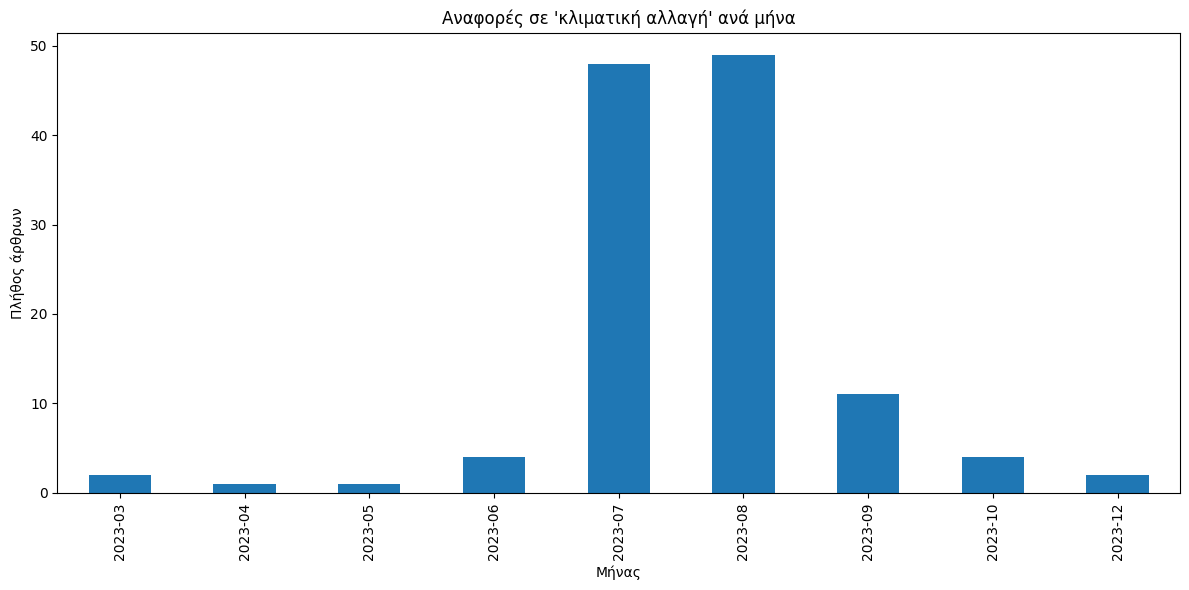

In [27]:
monthly_counts.plot(kind='bar', figsize=(12, 6), title="Αναφορές σε 'κλιματική αλλαγή' ανά μήνα")
plt.ylabel("Πλήθος άρθρων")
plt.xlabel("Μήνας")
plt.tight_layout()
plt.show()

In [28]:
for i, phrase in enumerate(words_around[:30], 1):
    print(f"{i}. {phrase}")

1. την ξηρασία και τη ζέστη που προκαλούνται από την κλιματική αλλαγή και «ανεξέλεγκτες», καθώς «οι τακτικές κα
2. ίηση των ποινών στους εμπρηστές μίλησε ο υπουργός Κλιματικής Κρίσης και Πολιτικής ΠροστασίαςΓια την αυστηροπ
3. ίηση των ποινών στους εμπρηστές μίλησε ο υπουργός Κλιματικής Κρίσης και Πολιτικής ΠροστασίαςΓια την αυστηροπ
4. πεται στο υπό ψήφιση νομοσχέδιο μίλησε ο υπουργός Κλιματικής Κρίσης και Πολιτικής Προστασίας, Βασίλης Κικίλι
5.  ολοένα και εντείνονται στον πλανήτη συνέπεια της κλιματικής αλλαγής. Σύμφωνα με πληροφορίες, αυτό που η κυβ
6. φιακής Δικαυβέρνησης και Πολιτικής Προστασίας και Κλιματικής Κρίσης, κρατούν χαμηλούς τόνους αφού πρέπε
7. πουργού, κ. Δημήτρη Παπαστεργίου, με το Υπουργείο Κλιματικής Κρίσης και Πολιτικής Προστασίας και δη, με τον 
8. σης Επιπτώσεων Φυσικών Καταστροφών του Υπουργείου Κλιματικής Κρίσης και Πολιτικής Προστασίας να εργάζονται ε
9. σης Επιπτώσεων Φυσικών Καταστροφών του Υπουργείου Κλιματικής Κρίσης και Πολιτικής Προστασίας, όπου αφ

In [31]:
cause_keywords = ["εξαιτίας", "λόγω", "αίτιο", "αιτία", "προκαλεί", "προκάλεσε", "συνέπεια", "σχετίζεται", "ευθύνεται", "οφείλεται"]

In [32]:
all_articles = df_2023["text"].dropna().tolist()

In [33]:
co_occurrence_count = 0

for article in all_articles:
    article_lower = article.lower()
    if "κλιματική αλλαγή" in article_lower or "κλιματική κρίση" in article_lower:
        if any(kw in article_lower for kw in cause_keywords):
            co_occurrence_count += 1

print(f"Αριθμός άρθρων με αιτιολογική σύνδεση με την κλιματική αλλαγή: {co_occurrence_count} από {len(all_articles)}")

Αριθμός άρθρων με αιτιολογική σύνδεση με την κλιματική αλλαγή: 18 από 307
